# Importing Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt

### Loading Data 

In [11]:
dirpath = "D:\Data-Science-Live-Master-Course-With-Python\KNN Classification data"
X = np.load(dirpath + "\X_data.npy")
y = np.load(dirpath + "\Y_data.npy")

In [12]:
# check if data is loaded or not by printing shape
print(X.shape , y.shape)

(500, 2) (500,)


### Visualize Data

In [13]:
# first feature in f1 and second in f2
f1 = X[:,0]
f2 = X[:,1]

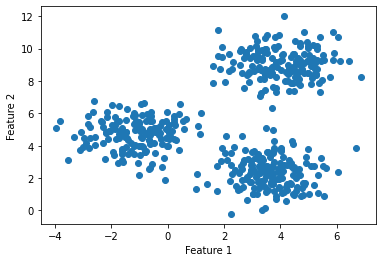

In [15]:
# plot feature 1 and 2 in graph
plt.scatter(f1 , f2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# got plot of same color

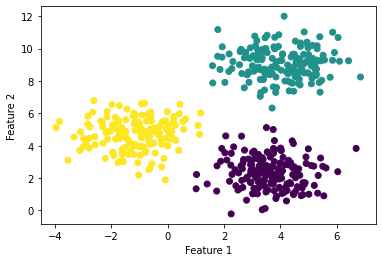

In [16]:
# plot feature 1 and 2 and give colors according to y 
plt.scatter(f1 , f2 , c = y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

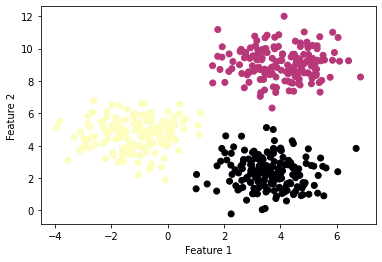

In [20]:
# plot feature 1 and 2 and give colors (already made color patterns)
plt.scatter(f1 , f2 , c = y , cmap = plt.cm.magma)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

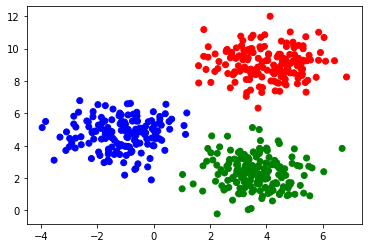

In [25]:
# We want to give custum colors 
# make a dictionary 
color_map = {0: 'green' , 1: 'red' , 2 : 'blue'}
colors = []
for label in y :
    colors.append(color_map[label])
plt.scatter(f1 , f2 , c = colors)
plt.show()

[0 1 2]


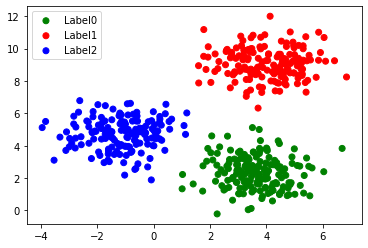

In [31]:
# want to do labeling by showing differnt class
# plotted every point one by one
colors = np.array(colors)
uni_cat = np.unique(y)
print(uni_cat)
for cat in uni_cat :
    bool_idx = y == cat
    plt.scatter(X[bool_idx,0] , X[bool_idx , 1] , c = colors[bool_idx] , label = f'Label{cat}')
plt.legend()
plt.show()

## KNN Class 

In [85]:
# making kNN class
class kNN :
    def __init__(self , k = 3) :
        self.k = k
        
    def find_distance(self , pt1 , pt2) :
        return ((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2) ** 0.5
    
    def predict(self , Xtrain , ytrain , Xtest) :
        distance = []
        for i in range(Xtrain.shape[0]) :
            dis = self.find_distance(Xtrain[i] , Xtest)
            distance.append(dis)
        distance = sorted(distance, key=lambda el: el[0])
        knn = distance[:self.k]
        k_cat = {}
        for el in knn :
            cat = y[el[1]]
            if(k_cat.get(cat)) == None :
                k_cat[cat] = 1
            else :
                k_cat[cat] += 1
        max_ = 0
        pred = [0 , 0]
        for cat , freq in k_cat.items() :
            if freq > max :
                pred = [cat , freq]
                max_ = freq
        return pred[0] , pred[1] / self.k

In [86]:
# taking one test point and checking our model
test_point = [2 ,5]
model = kNN()
prediction , accuracy = model.predict(X , y , test_point)
print(f"Predicted Class:{prediction}")
print(f"Accuracy :{accuracy}")

IndexError: invalid index to scalar variable.